## Introduction to Xarray

In data science setting, it is common to deal with datasets that by nature are tabular and easier to manage. However, how these same ideas translate to designing datasets and datastructures that take into account specific domain knowledge. For example, for earth and climate sciences it is important to manage remote sensing data that usually comes in the form of large dimensional arrays that can include two-dimensional arrays that can contain time series data and measurements in more than one specific band. 

Resources:
- [Dr. Chelle Gentemann Presentation](https://docs.google.com/presentation/d/11Tqlzbfq2rSjRJ6HoggLCFzdl-Nx8k1HWsefRWoaSGc/edit#slide=id.g215fc39eaf6_0_6)
- [xarray documentation](https://docs.xarray.dev/en/stable/)

**Acknowledgment:** Large part of the contents in this notebook were done by [Dr. Chelle Gentemann](https://cgentemann.github.io).

### 1. Motivation

Assumptions about how data is structured. For example, the two basic types of datastructures we work in Python are 
- Lists, matrices, multidimensional arrays: These are very quite common structures in the physical sciences. The main library to manipulate these _tensorial_ structures in Python is `numpy`.
- Tabular data: `pandas`, assumption of _observations_ and _features_
This is quite natural datastructures that we often find in data science projects. However, they don't include all the types of data structures we want to work with. 
```{note}
The library `pandas` is internally designed using `numpy`. However, the conceptual setup and the way users manipulate data with the library are radically different. 
```

However, when we start dealing with multidimensional data (eg, three dimensional data involving latitude, longitude and time) we start having problems, including: 
- how do we keep track of which ones are our _coordinate variables_? Latitude, longitude and time are quite special physical quantities. If we just work with numpy arrays, we have no way of knowing which dimension corresponds to each coordinate. 
- How to store multiple datasets using the same coordinate system. Even worse, how do we keep track of datasets with different dimensions? For example, for a dataset that collects temperature measurements, we can imagine using a three dimensional array (lat, lon, time). However, we may want to also include a dataset with surface elevations, for which time is useless and we have a dataset in (lat, lon). 
- How can we include information in our array about the dataset? This includes the metadata, units, product specifications. Notice that `numpy` arrays don't carry units. 


## 2. Xarray

In [1]:
# Stdlib imports
from pathlib import Path

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

# Small style adjustments for more readable plots
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

For the purposes of this tutorial, we are going to be working with the satellite data product ERA5:
- Atmospheric global climate reanalyses
- From 1979-2019, hourly estimates of atmospheric, land and oceanic climate variables. 
- 30km global grid with 137 vertical grid points. 

```{note}
Notice where the dataset is stored. If you are running this notebook from the Hub, you will see this is located on our shared folder. 
```

In [2]:
DATA_DIR = Path.home()/Path('shared/climate-data')
monthly_2deg_path = DATA_DIR / "era5_monthly_2deg_aws_v20210920.nc"
ds = xr.open_dataset(monthly_2deg_path)

We can open the `.nc` dataset directly as a xarray. A `xarray.Dataset` consists in a collection of objects, including:
- Dimensions
- Coordinates
- Data Variables

You can directly visualize all these objects by displaying the xarray:

In [3]:
ds

<xarray.Dataset> Size: 490MB
Dimensions:                                                                                   (
                                                                                               time: 504,
                                                                                               latitude: 90,
                                                                                               longitude: 180)
Coordinates:
  * time                                                                                      (time) datetime64[ns] 4kB ...
  * latitude                                                                                  (latitude) float32 360B ...
  * longitude                                                                                 (longitude) float32 720B ...
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            (time, latitude, longitude) float32 33MB ...
    air_temperature_at_2_metres                                                               (time, latitude, longitude) float32 33MB ...
    air_temperature_at_2_metres_1hour_Maximum                                                 (time, latitude, longitude) float32 33MB ...
    air_temperature_at_2_metres_1hour_Minimum                                                 (time, latitude, longitude) float32 33MB ...
    dew_point_temperature_at_2_metres                                                         (time, latitude, longitude) float32 33MB ...
    eastward_wind_at_100_metres                                                               (time, latitude, longitude) float32 33MB ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              (time, latitude, longitude) float32 33MB ...
    northward_wind_at_10_metres                                                               (time, latitude, longitude) float32 33MB ...
    precipitation_amount_1hour_Accumulation                                                   (time, latitude, longitude) float32 33MB ...
    sea_surface_temperature                                                                   (time, latitude, longitude) float32 33MB ...
    snow_density                                                                              (time, latitude, longitude) float32 33MB ...
    surface_air_pressure                                                                      (time, latitude, longitude) float32 33MB ...
Attributes:
    institution:  ECMWF
    source:       Reanalysis
    title:        ERA5 forecasts

There are a few things we can observe here:
- Types of each data object and their respective dimensions. 
- Metadata
- We can observe at the atributes of the datasets by clicking in the icons next to each dataset. 

### 2.1. Basic exploration

All the datasets can have different contents, but the coordinates are fixed for all of them. In order to access these and their respective name, we can use `.dims` and `.coords`:

In [4]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 504, 'latitude': 90, 'longitude': 180})

In [5]:
ds.coords

Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T11:30:00 ... 2020-12-16T1...
  * latitude   (latitude) float32 360B -88.88 -86.88 -84.88 ... 87.12 89.12
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9

Just as in `pandas`, we can read the datasets using two different syntaxes.

In [6]:
temp = ds["air_temperature_at_2_metres"]
temp

<xarray.DataArray 'air_temperature_at_2_metres' (time: 504, latitude: 90,
                                                 longitude: 180)> Size: 33MB
[8164800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T11:30:00 ... 2020-12-16T1...
  * latitude   (latitude) float32 360B -88.88 -86.88 -84.88 ... 87.12 89.12
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

In [7]:
ds.air_temperature_at_2_metres

<xarray.DataArray 'air_temperature_at_2_metres' (time: 504, latitude: 90,
                                                 longitude: 180)> Size: 33MB
[8164800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T11:30:00 ... 2020-12-16T1...
  * latitude   (latitude) float32 360B -88.88 -86.88 -84.88 ... 87.12 89.12
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

Notice that it is easier to keep track of what our code is doing since we can read what the datasets are. 

### 2.2. Subsetting data

There are three different ways of access subsets of the data
- `[]`: Simple and flexible, but confusing. Also notice we can do this just for DataArrays, while the next ones can be applied directy to the xarray.
- `isel`: Integer, positional, end-point exclusing. Still sensitive to error.
- `sel`: This is good for labels, end-point inclusive.

In general, when working with thes datasets is better to use `sel`. 
```{note}
This commands are very similar to the `loc` and `iloc` in pandas. 
```

What is the difference between doing slice and then `.data` or the other wat around?

In [8]:
temp[0, 63, 119].data

array(280.93103, dtype=float32)

In [9]:
temp.data[0, 63, 119]

280.93103

In [10]:
temp.isel(time=0,  
          latitude=63, 
          longitude=119).data

array(280.93103, dtype=float32)

In [11]:
temp.sel(time="1979-01", 
         latitude=37.125, 
         longitude=238.875).data

array([280.93103], dtype=float32)

What happens if we want to access the closest point in latitude and longitude? If the key we use for latitude, longitude or time is not in the dataset we will see the following error message:

In [13]:
temp.sel(time="1979-01", latitude=37.126, longitude=238.875, method='nearest')

<xarray.DataArray 'air_temperature_at_2_metres' ()> Size: 4B
array(280.93103, dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 1979-01-16T11:30:00
    latitude   float32 4B 37.12
    longitude  float32 4B 238.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

In [14]:
lat, lon = 37.126, 238.875

abslat = np.abs(ds.latitude - lat)
abslon = np.abs(ds.longitude - lon)

distance2 = abslat ** 2 + abslon ** 2

([xloc, yloc]) = np.where(distance2 == np.min(distance2))

temp.sel(time="1979-01", latitude=ds.latitude.data[xloc], longitude=ds.longitude.data[yloc])

<xarray.DataArray 'air_temperature_at_2_metres' (time: 1, latitude: 1,
                                                 longitude: 1)> Size: 4B
array([[[280.93103]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 8B 1979-01-16T11:30:00
  * latitude   (latitude) float32 4B 37.12
  * longitude  (longitude) float32 4B 238.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

We can also access slices of data

In [15]:
temp.isel(time=0, latitude=slice(63, 65), longitude=slice(119, 125))

<xarray.DataArray 'air_temperature_at_2_metres' (latitude: 2, longitude: 6)> Size: 48B
array([[280.93103, 272.38843, 271.50885, 270.77847, 268.52744, 267.5718 ],
       [276.909  , 268.4416 , 265.8512 , 264.58868, 265.966  , 263.49173]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 1979-01-16T11:30:00
  * latitude   (latitude) float32 8B 37.12 39.12
  * longitude  (longitude) float32 24B 238.9 240.9 242.9 244.9 246.9 248.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

In [16]:
temp.sel(time="1979-01",
         latitude=slice(temp.latitude[63], temp.latitude[65]),
         longitude=slice(temp.longitude[119], temp.longitude[125]))

<xarray.DataArray 'air_temperature_at_2_metres' (time: 1, latitude: 3,
                                                 longitude: 7)> Size: 84B
array([[[280.93103, 272.38843, 271.50885, 270.77847, 268.52744, 267.5718 ,
         267.39337],
        [276.909  , 268.4416 , 265.8512 , 264.58868, 265.966  , 263.49173,
         264.07922],
        [269.05563, 266.26437, 265.55194, 263.19815, 264.29312, 261.77335,
         259.54166]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 8B 1979-01-16T11:30:00
  * latitude   (latitude) float32 12B 37.12 39.12 41.12
  * longitude  (longitude) float32 28B 238.9 240.9 242.9 244.9 246.9 248.9 250.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

### 2.3. Making plots

Making plots with xarray is extremely easy. One of the advantages of using xarray is that the plot will automatically include axis information, since each numerical value in the xarray has assigned a name, either by they coordinate of the dataset product name.

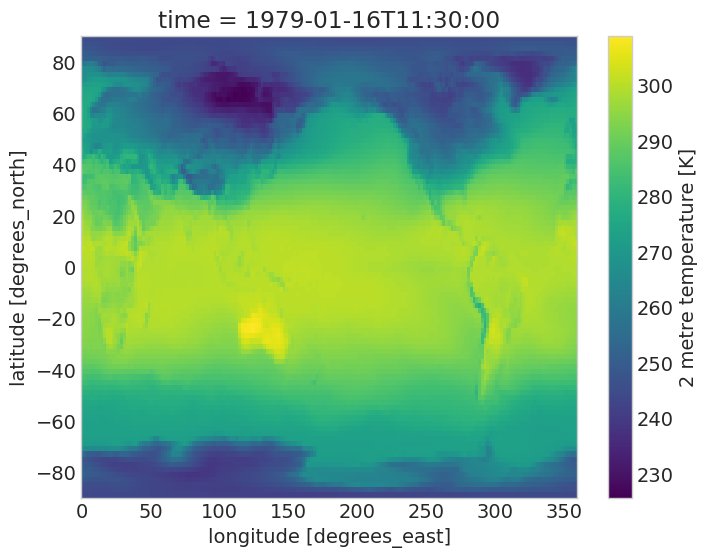

In [17]:
ds.air_temperature_at_2_metres.sel(time="1979-01").plot();

This is just a line of code... quite impressive. 

Also, depending what we want to plot, xarray will realize which type of plot we want to make. For example, if we subset in both latitude and longitude, xarray realizes that we want to plot a timeseries:

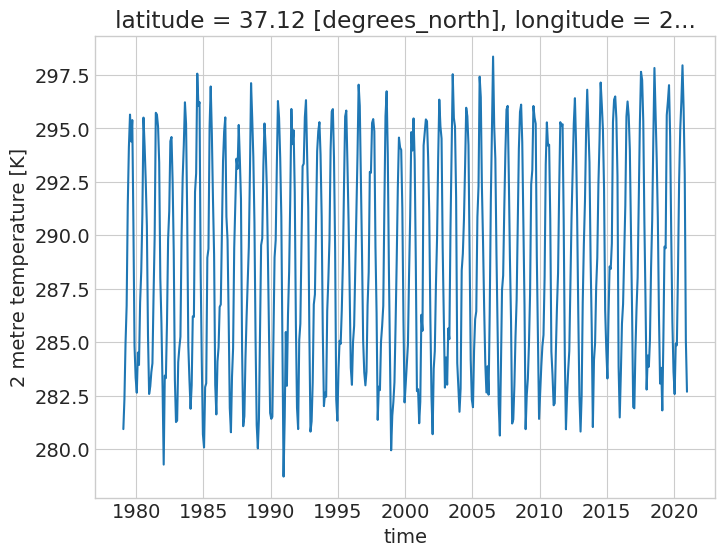

In [18]:
ds.air_temperature_at_2_metres.sel(latitude=37.125, longitude=238.875).plot();

### 2.4. Operations with xArray

In many aspects, you can manipulate xarrays as if you were working with pandas dataframes. For example, you can compute means by

In [19]:
ds.air_temperature_at_2_metres.mean("time")

<xarray.DataArray 'air_temperature_at_2_metres' (latitude: 90, longitude: 180)> Size: 65kB
array([[228.23622, 228.2012 , 228.1636 , ..., 228.33353, 228.29826,
        228.26756],
       [228.58359, 228.43468, 228.2972 , ..., 229.14705, 228.94029,
        228.75558],
       [228.8029 , 228.41632, 228.07332, ..., 230.17851, 229.69302,
        229.23451],
       ...,
       [260.34787, 260.42014, 260.47144, ..., 260.13943, 260.22015,
        260.28165],
       [259.83597, 259.8577 , 259.88016, ..., 259.74002, 259.76907,
        259.80435],
       [259.41345, 259.4211 , 259.42905, ..., 259.3969 , 259.4033 ,
        259.40765]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 360B -88.88 -86.88 -84.88 ... 87.12 89.12
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9

In [20]:
ds.mean("time").air_temperature_at_2_metres

<xarray.DataArray 'air_temperature_at_2_metres' (latitude: 90, longitude: 180)> Size: 65kB
array([[228.23622, 228.2012 , 228.1636 , ..., 228.33353, 228.29826,
        228.26756],
       [228.58359, 228.43468, 228.2972 , ..., 229.14705, 228.94029,
        228.75558],
       [228.8029 , 228.41632, 228.07332, ..., 230.17851, 229.69302,
        229.23451],
       ...,
       [260.34787, 260.42014, 260.47144, ..., 260.13943, 260.22015,
        260.28165],
       [259.83597, 259.8577 , 259.88016, ..., 259.74002, 259.76907,
        259.80435],
       [259.41345, 259.4211 , 259.42905, ..., 259.3969 , 259.4033 ,
        259.40765]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 360B -88.88 -86.88 -84.88 ... 87.12 89.12
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9

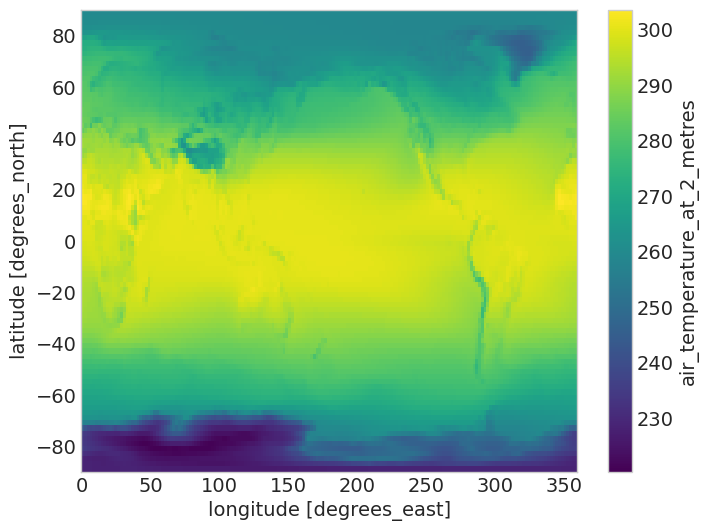

In [21]:
ds.mean("time").air_temperature_at_2_metres.plot();

```{note}
Operations in xarray are _lazy_: the actual operation you want to perform is not calculated until you really need it. 
```

### 2.5. Groupby

Just like you can do it with pandas, you can use `groupby` with xarray in order to group dataset variables as a function of their coordinates. The most important argument of `groupby()` is `group`. When grouping by time attributes, you can use `time.dt` to access that coordinate as a datetime object. 

In [22]:
ds.groupby(ds.time.dt.year).mean()

<xarray.Dataset> Size: 41MB
Dimensions:                                                                                   (
                                                                                               year: 42,
                                                                                               latitude: 90,
                                                                                               longitude: 180)
Coordinates:
  * latitude                                                                                  (latitude) float32 360B ...
  * longitude                                                                                 (longitude) float32 720B ...
  * year                                                                                      (year) int64 336B ...
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            (year, latitude, longitude) float32 3MB ...
    air_temperature_at_2_metres                                                               (year, latitude, longitude) float32 3MB ...
    air_temperature_at_2_metres_1hour_Maximum                                                 (year, latitude, longitude) float32 3MB ...
    air_temperature_at_2_metres_1hour_Minimum                                                 (year, latitude, longitude) float32 3MB ...
    dew_point_temperature_at_2_metres                                                         (year, latitude, longitude) float32 3MB ...
    eastward_wind_at_100_metres                                                               (year, latitude, longitude) float32 3MB ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              (year, latitude, longitude) float32 3MB ...
    northward_wind_at_10_metres                                                               (year, latitude, longitude) float32 3MB ...
    precipitation_amount_1hour_Accumulation                                                   (year, latitude, longitude) float32 3MB ...
    sea_surface_temperature                                                                   (year, latitude, longitude) float32 3MB ...
    snow_density                                                                              (year, latitude, longitude) float32 3MB ...
    surface_air_pressure                                                                      (year, latitude, longitude) float32 3MB ...
Attributes:
    institution:  ECMWF
    source:       Reanalysis
    title:        ERA5 forecasts